In [1]:
!pip install tensorflow opencv-python matplotlib

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/9e/b8/ed5f794359d05cd0bffb894c6418da87b93016ee17b669d55c45d1bd5d5b/tensorflow-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/fb/c4/f574ba6f04e6d7bf8c38d23e7a52389566dd7631fee0bcdd79ea07ef2dbf/opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/2f/2f/3c84f675931ce3bcbc7e23acbba1e5d7f05ce769adab48322de57a9f5928/tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/126.5 kB ? eta -:--:--
     -------------------------------------- 126.5/126.5 kB 3.6 MB/s eta 0:00:00
  Obtaining dependency information for flatbuffers>=23.1.21 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flat

In [3]:
import tensorflow as tf 
import os
import numpy as np
from matplotlib import pyplot as plt

In [13]:
tf.keras.utils.image_dataset_from_directory??

In [6]:
data = tf.keras.utils.image_dataset_from_directory('data/Train')
data = data.map(lambda x,y: (x/255, y))
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

Found 1220 files belonging to 2 classes.


In [18]:
batch[0].shape

(32, 256, 256, 3)

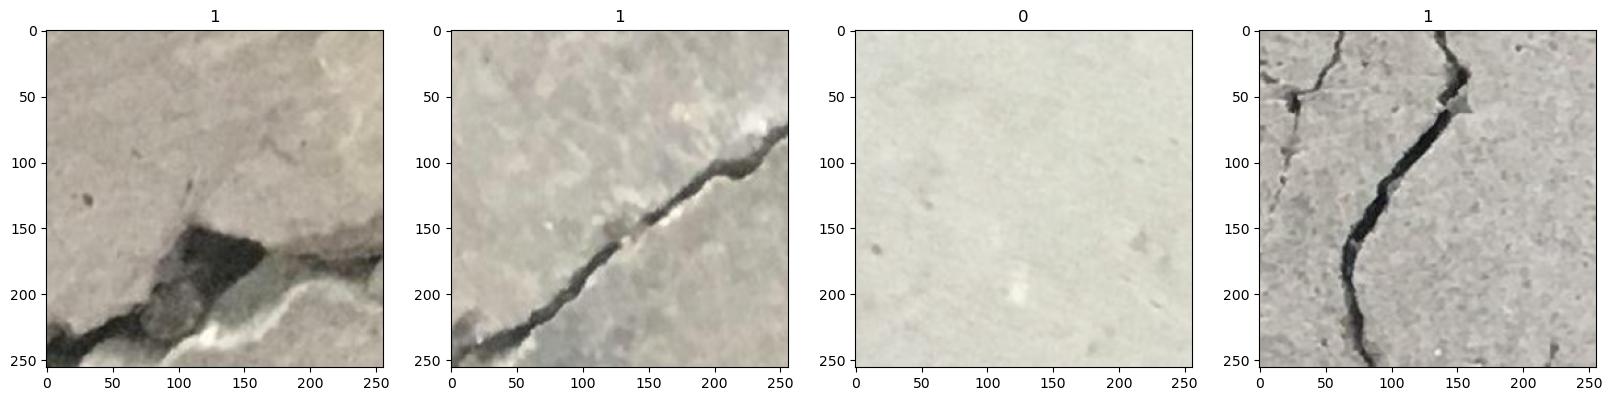

In [9]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])


In [10]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [11]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [19]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [22]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [23]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.6090 - loss: 0.7760 - val_accuracy: 0.5898 - val_loss: 0.7513
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.6977 - loss: 0.5302 - val_accuracy: 0.9453 - val_loss: 0.2439
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.9321 - loss: 0.1946 - val_accuracy: 0.9531 - val_loss: 0.0919
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.9673 - loss: 0.1093 - val_accuracy: 0.9023 - val_loss: 0.2663
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.9603 - loss: 0.1084 - val_accuracy: 0.9883 - val_loss: 0.0814
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.9820 - loss: 0.0836 - val_accuracy: 0.9844 - val_loss: 0.1130
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.9719 - loss: 0.1265 - val_accuracy: 0.9883 - val_loss: 0.2000
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.9744 - loss: 0.1403 - val_accuracy: 0.9922 - val_loss:

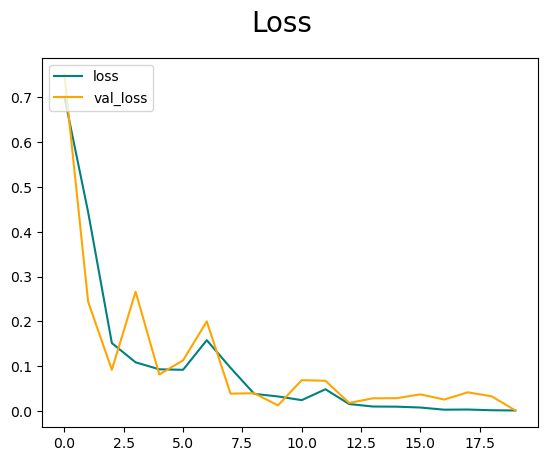

In [24]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

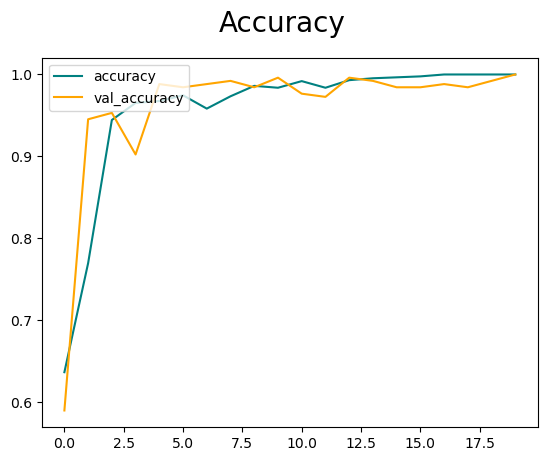

In [25]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [27]:
from keras.metrics import Precision, Recall, BinaryAccuracy

In [28]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [29]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    pred = model.predict(X)
    pre.update_state(y, pred)
    re.update_state(y, pred)
    acc.update_state(y, pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 996ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


In [30]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [ ]:
#TEST

In [35]:
img = cv2.imread('img_path')
plt.imshow(img)
plt.show()

NameError: name 'cv2' is not defined

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
prediction = model.predict(np.expand_dims(resize/255, 0))

In [34]:

model.save(os.path.join('models','imageclassifier.h5'))


In [ ]:
new_model = load_model('imageclassifier.h5')
new_model.predict(np.expand_dims(resize/255, 0))